# If you are in Colab, do that :

In [1]:
# !git clone https://github.com/Mustapha-AJEGHRIR/ML_short_project
# !cp -r ML_short_project/* .

Cloning into 'ML_short_project'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 80 (delta 36), reused 65 (delta 25), pack-reused 0
Unpacking objects: 100% (80/80), done.


# Needed definitions and liberaries

In [8]:
import sys

import pandas as pd
import numpy as np

# !pip install shap
import shap

from joblib import load #To save the trained models

sys.path.append("./libs") #Get the libs

from configurations import *

# Load processed data

In [9]:
data_proc = pd.read_csv("inputs/processed_data.csv", index_col= False)
data_proc.describe()


X, y = data_proc[training_columns].to_numpy(), data_proc[predict_column].to_numpy()

# Load model

In [10]:
final_model = load("model/final_model.joblib")
xgb = final_model.estimators_[1] #The XGB pipline inside the Voting classifier

Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator Pipeline from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator DummyClassifier from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 0.22.2.post1. This might lead to breaki

# SHAP

We are only going to use XGB to see the effect of our features because of the following :


*   Voting Classifier is not compatible with SHAP
*   RandomForest is not compatible with SHAP



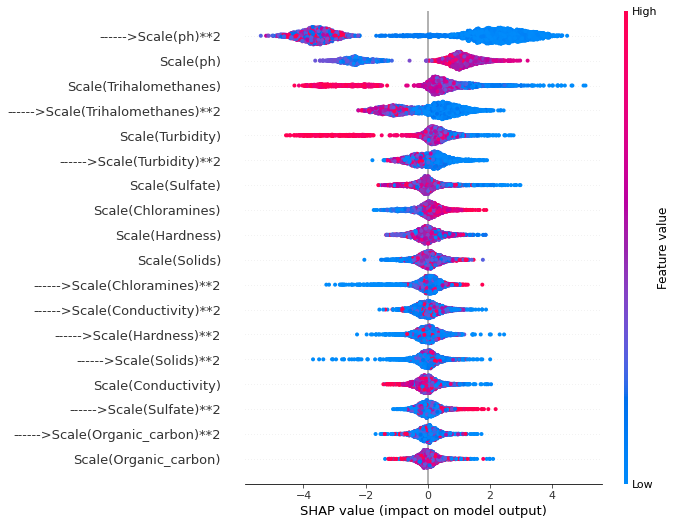

In [11]:
#load JS vis in the notebook
shap.initjs() 

#set the tree explainer as the model of the pipeline
explainer = shap.TreeExplainer(xgb['XGB'])

#apply the preprocessing to X
X_1 = xgb['Scaler'].transform(X)
X_2 = xgb['Square'].transform(X_1)

#get Shap values from preprocessed data
shap_values = explainer.shap_values(X_2)

#plot the feature importance
shap.summary_plot(shap_values, X_2, feature_names=["Scale(" + name + ")" for name in training_columns]+ ["------>Scale(" + name + ")**2" for name in training_columns])